# I - Steady Flight : Quasi-Steady Model
> _If you cannot see the HTML rendering (e.g. colors), view this notebook [here](https://nbviewer.jupyter.org/github/Mipanox/ME303/blob/master/dynamics/QS.ipynb)_

## <font color="blue">Equations</font>
### <font color="green">Forces</font>
Quasi-Steady model - Decompose the aerodynamic force linearly into the following components:
<br><br>
(1) Translational lift force
<br><br>
$
\;\;\;\;\mathbf{F_l} \equiv \sum_e\frac{1}{2}\rho c\left \| \mathbf{u_e} \right \|^2C_L(\alpha)\delta r
$
<br><br>
(2) Translational drag force
<br><br>
$
\;\;\;\;\mathbf{F_d} \equiv \sum_e\frac{1}{2}\rho c\left \| \mathbf{u_e} \right \|^2C_D(\alpha)\delta r
$
<br><br>
<font color="grey">(3) Rotational force
<br><br>
$
\;\;\;\;\mathbf{F_r} \equiv \sum_eC_R\rho\dot{\alpha}c^2\left \| \mathbf{u_e} \right \|\delta r
$
<br><br>
(4) Added mass force
<br><br>
$
\;\;\;\;\mathbf{F_a} \equiv \sum_e\frac{\rho\pi c^2}{4}\left \{ \frac{\mathbf{u_e}\dot{\mathbf{u_e}}}{\left \| \mathbf{u_e} \right \|}\sin\alpha + \left \| \mathbf{u_e} \right \|\dot{\alpha}\cos\alpha \right \}\delta r
$</font>

<br><br>

where a subscript $e$ stands for element of the wing, $\rho$ is the air density, $c$ the chord length of each element at a given radius $r$, and the integrals are approximated by summation over element width $\delta r$.
<br><br>
The aerodynamic parameters are: $C_L$, $C_D$ and $C_R$ being the lift, drag and rotational force coefficients, and $\alpha$ is the effective angle of attack for each element.
The harmonic equations for the lift and drag coefficients are adapted from the hummingbird data (Kruyt _et al._ [2014](http://rsif.royalsocietypublishing.org/content/11/99/20140585)). The lift coefficients are scaled up twice due to the (roughly) 2 times larger lift coefficients observed in pigeons (Usherwood [2009](http://link.springer.com/article/10.1007%2Fs00348-008-0596-z)), which are more similar in size to our birds:
<br><br>
$
\;\;\alpha < 0:
$
<br>
$
\;\;\;\;C_L(\alpha) = 0.0056 + 2.2502\cos(0.0332\alpha+4.6963)
$
<br>
$
\;\;\;\;C_D(\alpha) = 1.1993 + 1.0938\cos(0.0281\alpha+3.1277)
$
<br>
<br><br>
$
\;\;\alpha \geqslant 0:
$
<br>
$
\;\;\;\;C_L(\alpha) = 0.0062 + 3.1684\cos(0.0301\alpha+4.7124)
$
<br>
$
\;\;\;\;C_D(\alpha) = 8.3171 + 8.1909\cos(0.0073\alpha+3.1416)
$
<br><br>
where $\alpha$ is in `degrees` while the argument inside cosine is in `radians`.

<br><br>
<font color="purple">The total force (vector sum) is 
<br><br>
$
\mathbf{F_\text{tot}} = \mathbf{F_l} + \mathbf{F_d} \left ( + \mathbf{F_r} + \mathbf{F_a} \right )
$</font>
<br><br>
Note: In evaluating lift/weight and/or drag/thrust balance, it is useful to decompose the total force into the horizontal and vertical components.

### <font color="green">Power</font>
The power induced by the drag forces is computed by simple Newtonian physics:
<br><br>
$
\;\;\;\;P_D = \sum_e\mathbf{F_d}\cdot\mathbf{u_e} = \sum_e\left \| F_d \right\|\left \| u_e \right\|
$
<br><br>
the second equality holds since the drag force is always parallel with the local velocity.
<br><br>
<font color="grey">
** _The formulae below are not used_ **
<br>
Drag (profile) power from quasi-steady model and actuator induced power:
<br><br>
(1) Profile Power (one wing):
<br><br>
$
\;\;\;\;\mathbf{P_P} \equiv \frac{16\pi^3}{3}\rho|\hat{r_3}R|^3S\overline{C_D}\Phi^3f^3
$
<br><br>
(2) Induced Power:
<br><br>
$
\;\;\;\;\mathbf{P_I} \equiv \kappa_1\kappa_2\sqrt{\frac{W^3}{4\rho\Phi R^2}}
$
<br><br>
where $S=\pi c(0)R/4$, $\Phi$ and $f$ are the wing area (see below), 
stroke amplitude (in radians) and flapping frequency (in Hertz), respectively.
$W$ denotes the body weight in Newton.
<br><br>
The non-dimensional coefficients can be inserted, by assuming universality (adopted from hummingbirds, Ingersoll and Lentink, private communication): effective "radius of gyration" (of order 3) $\hat{r_3}\approx0.55$, corrections $\kappa_1\approx\kappa_2\approx1.2$, and the average drag coefficient (see also the justification in model [notebook](https://github.com/Mipanox/ME303/blob/master/dynamics/models.ipynb)) $\overline{C_D}\approx0.17$.
<br><br>

The total power is therefore (two wings plus one actuator):
<br><br>
$
P_\text{tot} = 2P_P+P_I
$</font>

---
## <font color="blue">Parameters</font>
_(See also the model [notebook](https://github.com/Mipanox/ME303/blob/master/dynamics/models.ipynb) for assumptions)_<br>
_(Note: All the numbers are justified based on the kinematics (see estimates [notebook](https://github.com/Mipanox/ME303/blob/master/others/estimates.ipynb))_

In [30]:
exec(open('../codes/preset.py').read())
%matplotlib inline

In [71]:
## read in parameters
sho_df = pd.read_csv('../others/par_data/sho_par.csv')
avo_df = pd.read_csv('../others/par_data/avo_par.csv')

In [72]:
sho_df

,Unnamed: 0,vx_sf,vx_de,vx_ld,t_dec,w_f,w_a,foot_ang,foot_len,body_m,wing_a,wing_r,ang
0,0,1434.8684,764.809273,89.894818,0.501044,6.632416,21.709066,10,10,600,15,35,20


In [73]:
avo_df

,Unnamed: 0,vx_sf,vx_de,vx_ld,t_dec,w_f,w_a,body_m,wing_a,wing_r,ang
0,0,638.215281,283.721562,13.27431,0.350405,6.632416,21.709066,300,15,35,60


---
* Neglect forces exerted by body, tail, and feet (at the moment)
* Each Wing is a half-ellipse, of which chord length is given by:
<br><br>
$
\;\;\;\;c(r) = c(0)\sqrt{1-\left(\frac{r}{R}\right)^2}
$
<br><br>
where $c(0)\approx15$cm is the chord length at the shoulder (hence radius 0) and $R$ denotes the wingspan, 
which is taken to be $35$cm for both species (cf. full WS $\approx 80$cm). 
So the wing area is half the ellipse area $=\pi c(0)R/4$ since $c(0)/2$ and $R$ are the semi axes.
<br><br>
* Wing motion is sinusoidal with fixed frequency, amplitude, and rotational angle (with $45^\circ$ at midstroke)
<br><p style="text-indent: 30px">`amplitude` $\approx21.7$cm $\approx0.62$rad
<br><p style="text-indent: 30px">`frequency` $\approx6.63$Hz $\approx41.7$rad/s

### <font color="green">Scenarios</font>
The QS model is used for the steady flight (assumed to be of small advance ratio) phase before the bird starts to decelerate. Throughout, the body of the bird is treated as being aligned parallel to the horizontal, and aerodynamic torques are omitted in the discussion.
<br>
1. Avocet
<br><p style="text-indent: 30px">$v_\text{body} \approx 640$cm/s<br>
2. Shoveler
<br><p style="text-indent: 30px">$v_\text{body} \approx 1400$cm/s<br>

#### <font color="red">Calculations</font>
Define at time $t=0$, the wing starts a downstroke, with zero rotation.<br>
Do the computation in one full stroke (downstroke plus upstroke).

In [75]:
## parameters
### global
#--- 200 time steps
time_elapse = np.linspace(0.,1.,200)

wing_fre = float(sho_df['w_f']) * u.Hz
wing_amp = float(sho_df['w_a']) * u.cm
body_v_sho = float(sho_df['vx_sf']) * u.cm/u.s
body_v_avo = float(avo_df['vx_sf']) * u.cm/u.s

wing_a = float(sho_df['wing_a']) * u.cm
wing_r = float(sho_df['wing_r']) * u.cm

## body weights
sho_w = float(sho_df['body_m']) * 9.8 / 1000 # to Newton
avo_w = float(avo_df['body_m']) * 9.8 / 1000

In [76]:
exec(open('../codes/qs.py').read())

## <font color="blue">Results</font>

Plug in the numbers:

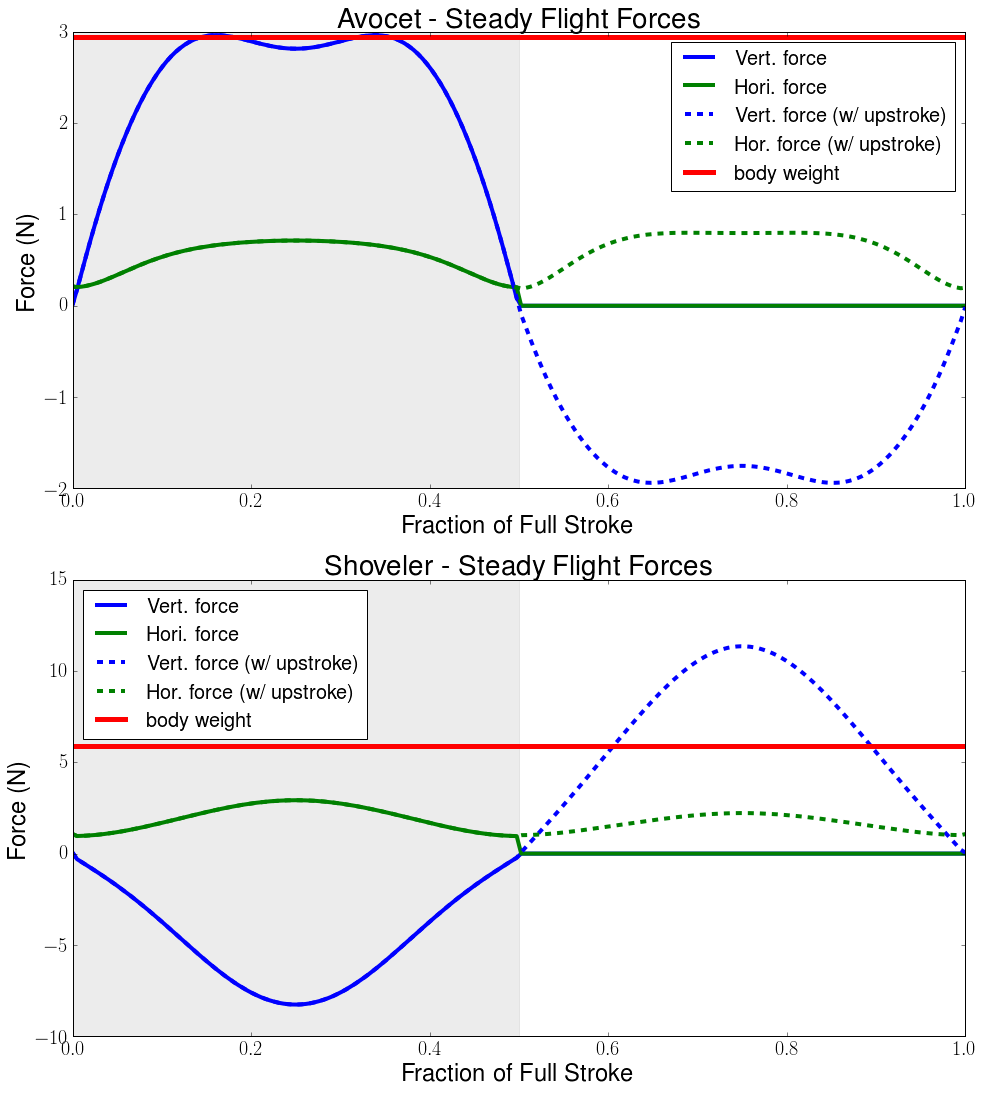

In [77]:
## two birds
sho = QS(wing_fre,wing_amp,wing_a,wing_r,body_v_sho)
avo = QS(wing_fre,wing_amp,wing_a,wing_r,body_v_avo)

## plotting
plt.figure(figsize=(16,18))
### avocet
plt.subplot(211)
t_avo = np.linspace(0,1,len(avo.time_step))
avo_fv,avo_fh,avo_fv_f,avo_fh_f = avo.transl_forces()

plt.plot(t_avo,avo_fv,'b',label='Vert. force',lw=4)
plt.plot(t_avo,avo_fh,'g',label='Hori. force',lw=4)
plt.plot(t_avo,avo_fv_f,'b--',label='Vert. force (w/ upstroke)',lw=4)
plt.plot(t_avo,avo_fh_f,'g--',label='Hor. force (w/ upstroke)',lw=4)
plt.plot([0,1],[avo_w]*2,'r',label='body weight',lw=5)
plt.axvspan(0, 0.5, alpha=0.15, color='grey')
plt.title('Avocet - Steady Flight Forces')
plt.legend(); plt.xlabel('Fraction of Full Stroke'); plt.ylabel('Force (N)')

### shoveler
plt.subplot(212)
t_sho = np.linspace(0,1,len(sho.time_step))
sho_fv,sho_fh,sho_fv_f,sho_fh_f = sho.transl_forces()

plt.plot(t_sho,sho_fv,'b',label='Vert. force',lw=4)
plt.plot(t_sho,sho_fh,'g',label='Hori. force',lw=4)
plt.plot(t_sho,sho_fv_f,'b--',label='Vert. force (w/ upstroke)',lw=4)
plt.plot(t_sho,sho_fh_f,'g--',label='Hor. force (w/ upstroke)',lw=4)
plt.plot([0,1],[sho_w]*2,'r',label='body weight',lw=5)
plt.axvspan(0, 0.5, alpha=0.15, color='grey')
plt.title('Shoveler - Steady Flight Forces')
plt.legend(loc='upper left'); plt.xlabel('Fraction of Full Stroke'); plt.ylabel('Force (N)')

Sadly the bulk speed of the shoveler seems to be too high so the effective angles of attack are negative in the downstrokes, which does not make sense. This reminds us how fragile the "quasi-steady" model for "low advance ratio" could be when we are applying it to a clearly fast-forward flight scenario. In light of this, the quantities derived for the avocet should be more reliable.

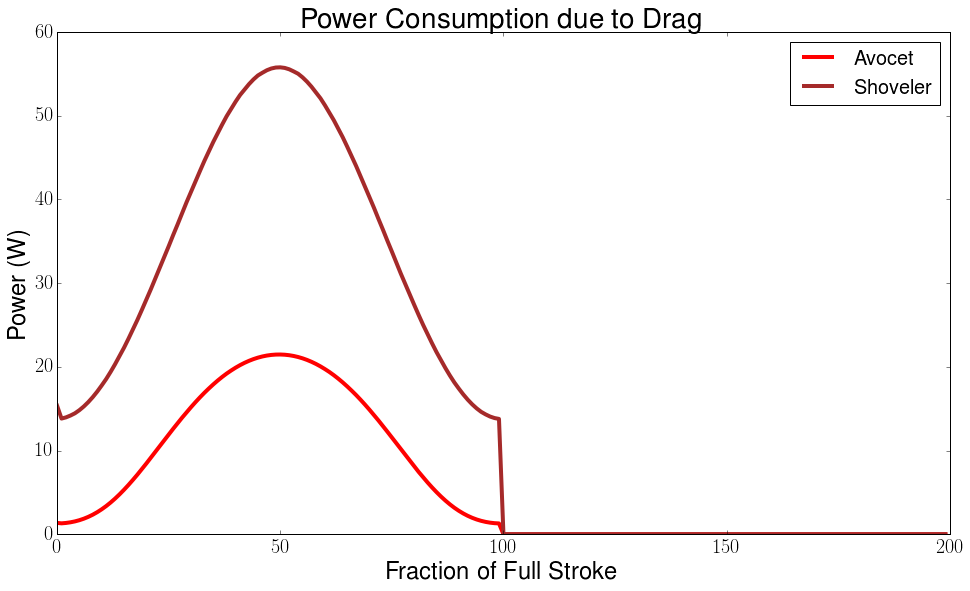

In [67]:
plt.figure(figsize=(16,9))
plt.plot(    avo.transl_d_power()[0] ,'r',label='Avocet',lw=4)
plt.plot(abs(sho.transl_d_power()[0]),'brown',label='Shoveler',lw=4)
plt.legend(); plt.xlabel('Fraction of Full Stroke'); plt.ylabel('Power (W)')
plt.title('Power Consumption due to Drag')

---
### <font color="brown">Some Supplementary Plots </font>

** Lift/Drag Coefficients **

In [23]:
def lift_drag_coeff(alpha):
    C_L,C_D = np.zeros(alpha.shape),np.zeros(alpha.shape)
    
    for (i,alp) in enumerate(alpha):
        if alp >= 0:
            a_L = 0.0301*alp+4.7124
            a_D = 0.0073*alp+3.1416
            C_L[i] = (0.0031 + 1.5842 * np.cos(a_L)) * 2
            C_D[i] =  8.3171 + 8.1909 * np.cos(a_D)
        else:
            a_L = 0.0332*alp+4.6963
            a_D = 0.0281*alp+3.1277
            C_L[i] = (0.0028 + 1.1251 * np.cos(a_L)) * 2
            C_D[i] =  1.1993 + 1.0938 * np.cos(a_D)
        
    return C_L, C_D

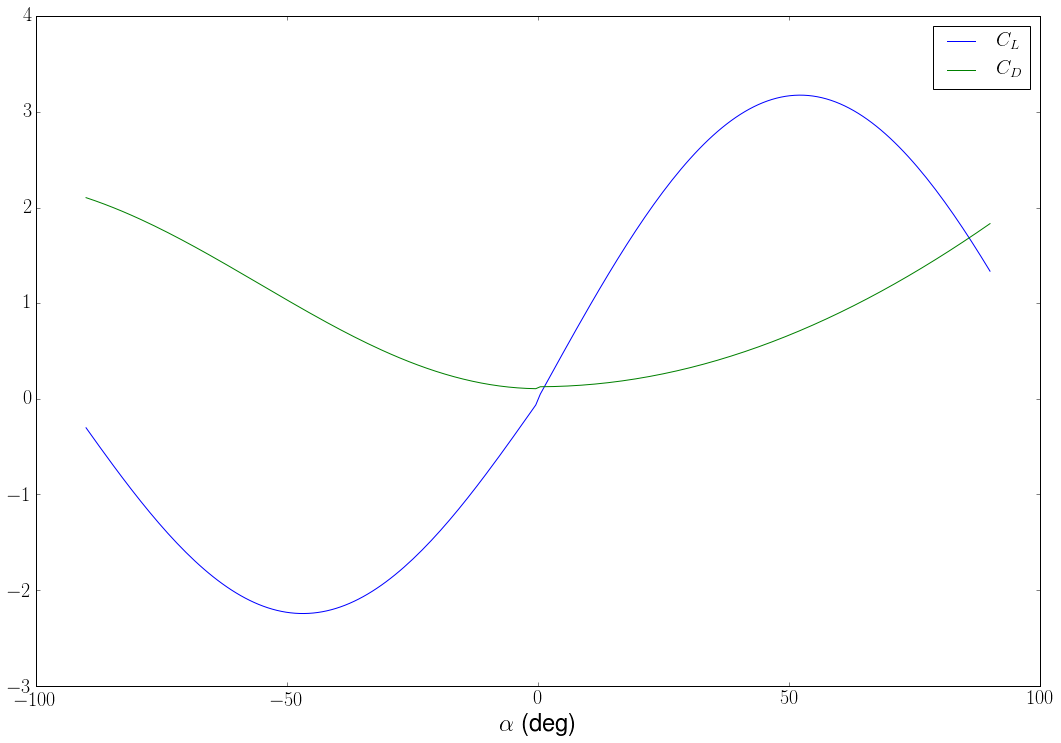

In [24]:
test_alpha = np.linspace(-90.,90.,200)
test_cl,test_cd = lift_drag_coeff(alpha=test_alpha)
plt.plot(test_alpha,test_cl,'b',label=r'$C_L$')
plt.plot(test_alpha,test_cd,'g',label=r'$C_D$')
plt.xlabel(r'$\alpha$ (deg)'); plt.legend()

** Angle of Attack: geometric v.s. effective **
The parameters were randomly chosen for tests...

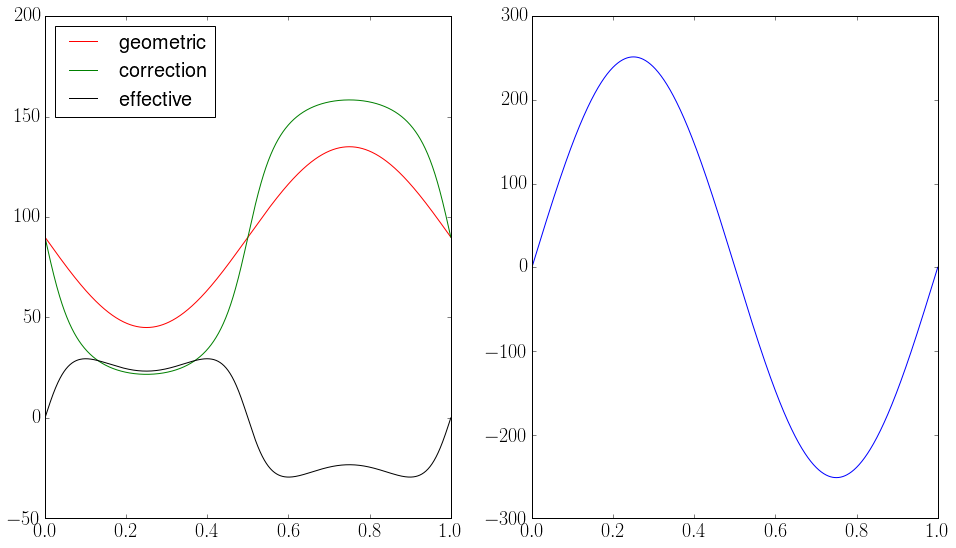

In [26]:
tt = np.linspace(0.,1,1000)
body_v = 100.
wing_v = 2*np.pi*np.sin(2*np.pi*tt)*40 #omega r

geo = 90-np.sin(2*np.pi*tt)*45
cor = np.mod(90-np.rad2deg(np.arctan(wing_v / body_v)),180)

plt.figure(figsize=(16,9))
plt.subplot(121)
plt.plot(tt,geo,'r',label='geometric')
plt.plot(tt,cor,'g',label='correction')
plt.plot(tt,geo-cor,'k',label='effective')
plt.legend(loc='upper left')

plt.subplot(122)
plt.plot(tt,wing_v)